<a href="https://colab.research.google.com/github/Tarnished2/DataScientist/blob/main/MachineLearning/12.RegressionModelValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pramaditya Ardian Saputra

# Studycase Model Validation for Regression

## Case

Berikut menggunakan studycase data Harga rumah di Boston. Data yang digunakan adalah dataset Boston yang disediakan oleh package sklearn.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

1. Load Dataset

In [ ]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load data
path = '/content/gdrive/MyDrive/SIB/4. Supervised Machine Learning - Regression/4.2 Regression Model Validation/'
df = pd.read_csv(path + 'HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Data Preparation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#cek banyaknya missing value
jumlah_missing=df.isna().sum()
jumlah_missing

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
#rasio
rasio = jumlah_missing.div(len(df))
rasio

CRIM       0.039526
ZN         0.039526
INDUS      0.039526
CHAS       0.039526
NOX        0.000000
RM         0.000000
AGE        0.039526
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.039526
MEDV       0.000000
dtype: float64

Karena missing value pada data sebesar 30%, maka untuk mengatasinya dengan cara Melakukan inputting value dengan data yang menyerupai seperti mean, median, modus

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


data tidak berdistribusi normal karena mean dan median berbeda sangat jauh. Sehingga untuk mengatasi missing value dengan cara menginputkan median.

In [ ]:
#menginputkan missing value dengan median
df.fillna(df.median(),inplace=True)

In [ ]:
#cek kembali missing value
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Correlation

2. Buatlah heatmap dan korelasi antar variabel? tentukan mana variabel yang kuat korelasinya?

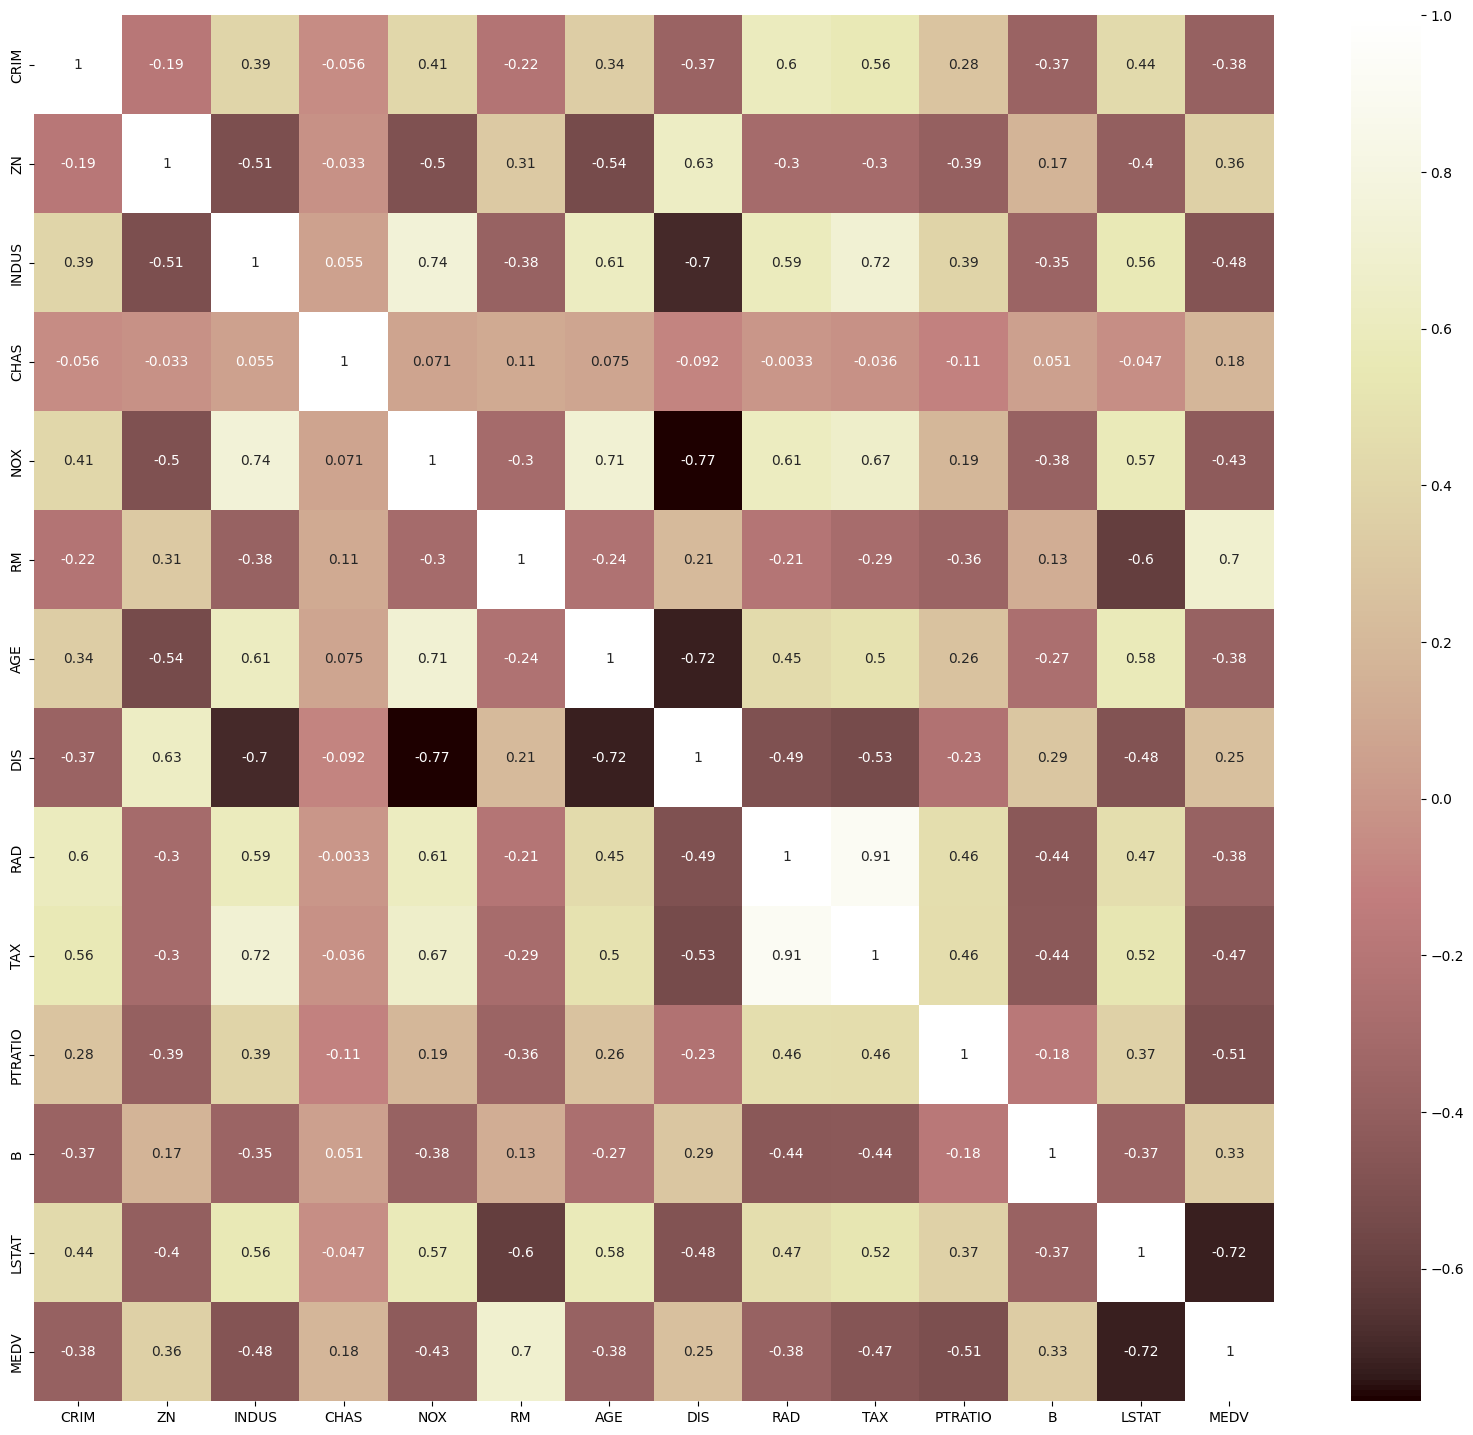

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.pink)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.723093
MEDV       1.000000
Name: MEDV, dtype: float64

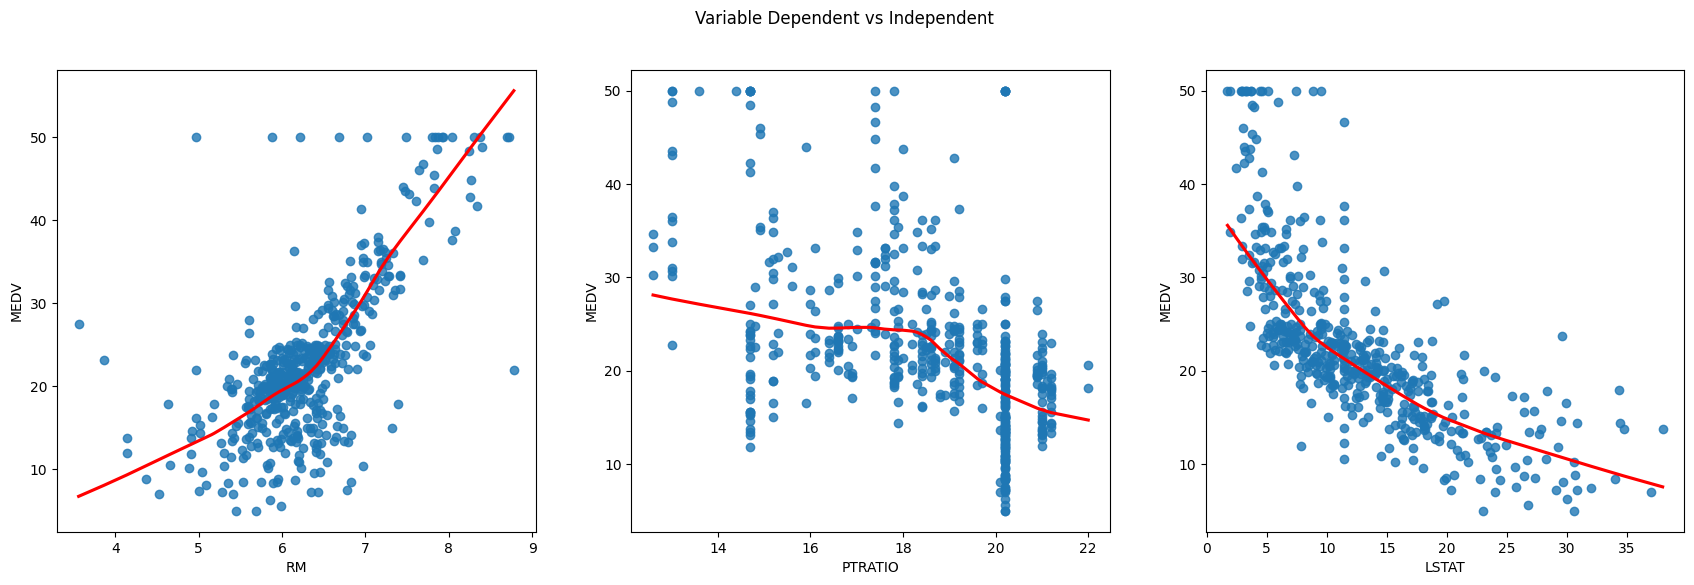

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
#membuat multivariate chart
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=df["RM"], y=df["MEDV"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=df["PTRATIO"], y=df["MEDV"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=df["LSTAT"], y=df["MEDV"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
plt.show()
plt.show

<ipython-input-13-60bea80d313a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["MEDV"])


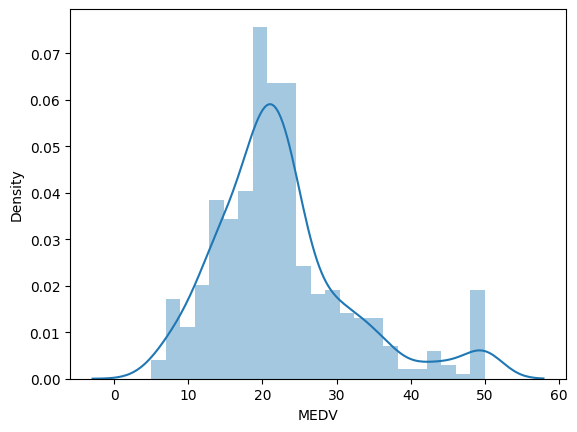

In [ ]:
#Membuat histogram dari MEDV
sns.distplot(df["MEDV"])
plt.show()

### Split Data

3. Buatlah model dengan split train dan test 70:30, lakukan pemodelan dan lakukan dengan iterasi 5 kali. Berapakah rata-rata MSE yang didapatkan?

In [ ]:
#split train dan test
y=df['MEDV']
X=df.iloc[:,0:13]
# split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [ ]:
#pemodelan regresi
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
#print beberapa output yang diperlukan, lm.coef, lm.intercept, R2, MSE
print('Labels\n',X.columns)
print('Coefficients : \n',lm.coef_)
print('Intercept :\n',lm.intercept_)
print('R2 for Train',lm.score(X_train,y_train))
print('R2 for Test (cross validation)',lm.score(X_test,y_test))
target_predicted=lm.predict(X_test)
print('MSE for test',metrics.mean_squared_error(y_test,target_predicted))

Labels
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Coefficients : 
 [-1.25759163e-01  3.83637394e-02 -6.75564639e-02  3.05985648e+00
 -1.46269923e+01  4.08559449e+00 -2.18053846e-02 -1.50569906e+00
  1.91466548e-01 -8.35636285e-03 -9.92310689e-01  6.41304566e-03
 -4.34338184e-01]
Intercept :
 35.81972103270243
R2 for Train 0.7588666072663288
R2 for Test (cross validation) 0.6557113177471495
MSE for test 28.667369838389003


In [ ]:
#Tunjukkan rata-rata MSE dan R2 hasil iterasi 5
MSE=np.zeros(5)
for i in range(5):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=i)
  lm=LinearRegression()
  lm.fit(X_train,y_train)
  target_predicted=lm.predict(X_test)
  MSE[i]=metrics.mean_squared_error(y_test,target_predicted) #MSE tiap iterasi
  print('Test set MSEfor {} cycle:()'.format(i+1,MSE[i]))
  r_sq=lm.score(X_test,y_test)
  print('coefficient of determination: ',r_sq)

Test set MSEfor 1 cycle:()
coefficient of determination:  0.6557113177471495
Test set MSEfor 2 cycle:()
coefficient of determination:  0.7684166325128833
Test set MSEfor 3 cycle:()
coefficient of determination:  0.7153647391730265
Test set MSEfor 4 cycle:()
coefficient of determination:  0.7006073730253605
Test set MSEfor 5 cycle:()
coefficient of determination:  0.7053893924828628


In [ ]:
#Rata-rata MSE
np.mean(MSE)

25.753289514333012

In [ ]:
#Rata-rata R2
np.mean(r_sq)

0.7053893924828628

### Model regresi dengan K-fold

4. Buatlah model regresi dengan K-fold validation dengan K=5. Tentukan berapa MSE dan R2 ?

In [ ]:
# Create 5 folds
seed=7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create a model
fit = LinearRegression()

# Train and evaluate multiple models using kfolds
results = cross_val_score(fit, X, y, cv=kfold, scoring='r2')
print(results)
print('Mean: ', results.mean())
print('Std: ', results.std())

[0.55310524 0.77533708 0.64794437 0.73818716 0.80753361]
Mean:  0.7044214897222798
Std:  0.09261481866321039
